# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [124]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

In [174]:
df = pd.read_csv('data/human_body_temperature.csv')
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 2.6+ KB


In [127]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


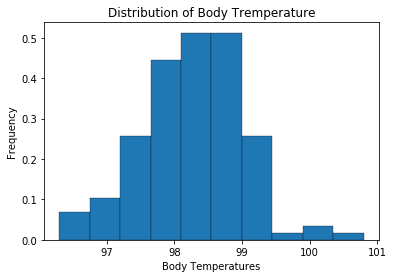

In [128]:
plt.hist(df['temperature'], bins=10, normed=True, edgecolor='black', linewidth=0.3)
plt.title('Distribution of Body Tremperature')
plt.ylabel('Frequency')
plt.xlabel('Body Temperatures')

###### 1. Is the distribution of body temperatures normal? 
As the the first and third quartile values are close to each other, and as the histogram shows the distribution of body temperatures appears to be normal, although the tails on each end differ slightly.

###### 2. Is the sample size large? Are the observations independent? 
As the general rule of CLT states that sample size equal or greater than 30 are considered sufficient for central limit theorem to hold. This sample contains 130 observations, therefore we can assume it is large enough to make statistical conclusions. We can also assume that observations are independent, as the individuals don't interact with each other and any changes in individuals' body temperatute won't affect others' body temperature. 

###### 3. Is the true population mean really 98.6 degrees F?

As we test whether there is a significant difference between the population mean, estimated as the sample mean, and a known value, against a null hyposesis that states there is no difference, we use **one-sample test**.

In [166]:
df['temperature'].mean()

98.249230769230749

As we determined that the sample size is large enough to hold CLT to hold, we can say that the sample mean is representative of the population mean. In our case the population mean is not 98.6, but it is estimated to be 98.25.

In [130]:
# convert 'temperature' column data into an array
bt = df['temperature'].values
type(bt)

numpy.ndarray

We will use **t-score** to calculate 95% and 99 % confidence intervals because we don't know the population standard deviation.

In [131]:
# function to calculate confidence interval with t score
def t_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = se * sp.stats.t.ppf((1 + confidence) / 2, n-1)
    return float("{0:.2f}".format(m-h)), float("{0:.2f}".format(m+h))

In [132]:
t_confidence_interval(bt, 0.95)

(98.12, 98.38)

In [133]:
t_confidence_interval(bt, 0.99)

(98.08, 98.42)

As we see, both the 95% and 99% confidence intervals do not include reported more than 120 years ago 98.6 value. This  tells us that either the calculation method was off, or the tools used to measure the body temperature were not accurate.

Since our sample size > 30 we can approximate the **z-score** as well, 
using sample std dev as an approximator for population std dev.

In [160]:
# function to calculate confidence interval with z score
def z_confidence_interval(data, confidence):
    z_score = scipy.stats.norm.ppf((1+confidence) / 2)
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    h = z_score * (se / n**(0.5))
    return float("{0:.2f}".format(m-h)), float("{0:.2f}".format(m+h))

In [161]:
z_confidence_interval(bt, 0.95)

(98.24, 98.26)

In [162]:
z_confidence_interval(bt, 0.99)

(98.23, 98.26)

Both 95% and 99% confidence intervals using z-score give narrower ranges that do not include 98.6.
This again tells us that the calculations done more than a century ago most likely were inaccurate, 
or the data were inconsistent, or the tools used to collect the data were imprecise.

###### 4. At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 

In [172]:
# function to calculate confidence interval with t score
def tt_confidence_interval(data, confidence):
    n = len(data)
    m, se = np.mean(data), scipy.stats.sem(data)
    me = se * sp.stats.t.ppf((1 + confidence) / 2, n-1)
    return float("{0:.2f}".format(m)),float("{0:.2f}".format(me)), float("{0:.2f}".format(m-me)), float("{0:.2f}".format(m+me))

In [173]:
tt_confidence_interval(bt, 0.95)

(98.25, 0.13, 98.12, 98.38)

Margin of error is 0.13. This means that whenever we conduct many surveys each having 130 samples
most of the time (95%) the normal body temperature will be around the mean (98.25) plus or minus 0.13.
Anything lower than 98.12 and above 98.38 we will consider "abnormal".

###### 5. Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 

Two-sample t-test investigates whether the means of two independent data samples differ from one another.   The null hypothesis is that there is no difference. We will calculate t-statistic and p-value to see if there is indeed a difference. If the null hypothesis was true, the t-statistic would equal 0.

In [197]:
df_m = df.loc[df['gender'] == 'M', 'temperature']
mean_m = df_m.mean()
mean_m

98.104615384615371

In [213]:
df_f = df[df['gender']== 'F']['temperature']
mean_f = df_f.mean()
mean_f

98.393846153846141

In [195]:
df.loc[df['gender'] == 'M'].count()

temperature    65
gender         65
heart_rate     65
dtype: int64

In [196]:
from scipy.stats import ttest_ind

In [210]:
t_stat, p_val = ttest_ind(df_m, df_f, equal_var=False)

In [211]:
t_stat

-2.2854345381656112

In [212]:
p_val

0.023938264182934196

For t-stat to be meaningful, we would need to plot the t-distribution to visualize the probability of t-values. But we have p_val, which is a probability value. In our case, the p_val is 0.024, which means that there is 2.4% chance we would see the sample data this far apart from the null hypothesis (2.28 in either direction from 0). This p-value is pretty low, and is not enough to reject the null hypothesis. If the p-value was greater than the common significance level of 0.05, then we would reject the null hypothesis and conclude that there is indeed difference between the means of the two sample data sets.

###### Conlusion
CLT supports that our sample data can represent the population data. We calculated that the average body temperature is actually different than it was reported before. The reported value was probably inaccurate due to limitations to perform precise measurments and calculations more than 120 years ago. Also, there is no significant difference between males and females in normal temperature.